<a href="https://colab.research.google.com/github/mihir1125/machine-learning/blob/master/neural_networks_mnist_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install -q mediapy

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import mediapy as media

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
#@title Helper functions
def label_to_vector(num):
    arr = np.zeros(10)
    arr[num] = 1
    return arr

In [3]:
# Fetch the dataset

mnist = tfds.image.MNIST()

In [4]:
# Describe the dataset with DatasetInfo

print(mnist.info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir=PosixGPath('/tmp/tmpp9prcqagtfds'),
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


In [5]:
# Download the data, prepare it, and write it to disk
mnist.download_and_prepare()

# Load data from disk as tf.data.Datasets
datasets = mnist.as_dataset()
train_ds, test_ds = datasets['train'], datasets['test']

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
X_train = np.array([example['image'].reshape(-1) for example in tfds.as_numpy(train_ds)])
y_train_vector = np.array([label_to_vector(example['label']) for example in tfds.as_numpy(train_ds)])
y_train = np.array([example['label'] for example in tfds.as_numpy(train_ds)])

# Test
X_test = np.array([example['image'].reshape(-1) for example in tfds.as_numpy(test_ds)])
y_test_vector = np.array([label_to_vector(example['label']) for example in tfds.as_numpy(test_ds)])
y_test = np.array([example['label']  for example in tfds.as_numpy(test_ds)])

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(784, )),
    tf.keras.layers.Dense(49, activation='relu', name='Layer1'),
    tf.keras.layers.Dense(25, activation='relu', name='Layer2'),
    tf.keras.layers.Dense(10, activation='softmax', name='Layer3')
], name='my_first_neural_network')

model.summary()

Model: "my_first_neural_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Dense)              (None, 49)                38465     
                                                                 
 Layer2 (Dense)              (None, 25)                1250      
                                                                 
 Layer3 (Dense)              (None, 10)                260       
                                                                 
Total params: 39,975
Trainable params: 39,975
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = [
        'Accuracy',
        'Precision',
        'Recall'
    ]
)

model.fit(X_train, y_train_vector, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 2.0030 - Accuracy: 0.5787 - precision: 0.8544 - recall: 0.4502
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6212 - Accuracy: 0.8234 - precision: 0.8913 - recall: 0.7854
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3655 - Accuracy: 0.9007 - precision: 0.9308 - recall: 0.8825
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2614 - Accuracy: 0.9296 - precision: 0.9466 - recall: 0.9184
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2111 - Accuracy: 0.9413 - precision: 0.9540 - recall: 0.9320
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1930 - Accuracy: 0.9466 - precision: 0.9584 - recall: 0.9394
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1741 - Accuracy: 0.9513 - precision: 0.9622 - recall: 0.9445
Epoch 8/10
1875/1875 [==

In [9]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test_vector)
print(f"{loss=}, {accuracy=}, {precision=}, {recall=}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1835 - Accuracy: 0.9559 - precision: 0.9621 - recall: 0.9516
loss=0.1834549903869629, accuracy=0.9559000134468079, precision=0.9620867371559143, recall=0.9516000151634216


In [10]:
n = np.random.randint(0, X_test.shape[0]-1)
media.show_image(X_test[n].reshape(28, 28, 1))
print(X_test[n].shape)
y_hat = model.predict(X_test[n].reshape(1, -1))
y = y_test_vector[n]
print(f"Actual: {y.argmax()}\nPrediction: {y_hat.argmax()}")

""


(784,)
1/1 [==============================] - 0s 96ms/step
Actual: 5
Prediction: 5


In [11]:
# Neural Network with ReLU
model2 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28*28,)),
    tf.keras.layers.Dense(49, activation='relu', name="Layer1"),
    tf.keras.layers.Dense(25, activation='relu', name="Layer2"),
    tf.keras.layers.Dense(10, activation='linear', name="Layer3")
])

model2.summary()

model2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = [
        'Accuracy',
        'Precision',
        'Recall',
    ]
)

model2.fit(X_train, y_train_vector, epochs=10)

loss, accuracy, precision, recall = model2.evaluate(X_test, y_test_vector)
print(f"{loss=}, {accuracy=}, {precision=}, {recall=}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Dense)              (None, 49)                38465     
                                                                 
 Layer2 (Dense)              (None, 25)                1250      
                                                                 
 Layer3 (Dense)              (None, 10)                260       
                                                                 
Total params: 39,975
Trainable params: 39,975
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7654 - Accuracy: 0.6848 - precision: 0.1785 - recall: 0.8168
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5292 - Accuracy: 0.8608 - precision: 0.1524 - recall: 0.9737
Epoch 3/10
1875/1875 [================

In [12]:
n = np.random.randint(0, X_test.shape[0]-1)
media.show_image(X_test[n].reshape(28, 28, 1))
print(X_test[n].shape)
y_hat = np.array(tf.nn.softmax(model2.predict(X_test[n].reshape(1, -1))))
y = y_test[n]
print(f"Actual: {y}\nPrediction: {y_hat.argmax()}")

""


(784,)
1/1 [==============================] - 0s 76ms/step
Actual: 6
Prediction: 6


In [13]:
result_1 = model.predict(X_test)
mistakes = [i for i, r in enumerate(result_1) if r.argmax() != y_test[i]]

print(f"Model 1 - Obvious method")
print(f"Incorrect predictions: {len(mistakes)}")
print()
print(f"Model 2 - Recommended Method")
result_2= model2.predict(X_test)
mistakes = [i for i, r in enumerate(result_2) if r.argmax() != y_test[i]]
print(f"Incorrect predictions: {len(mistakes)}")

313/313 [==============================] - 0s 2ms/step
Model 1 - Obvious method
Incorrect predictions: 441

Model 2 - Recommended Method
313/313 [==============================] - 0s 2ms/step
Incorrect predictions: 403


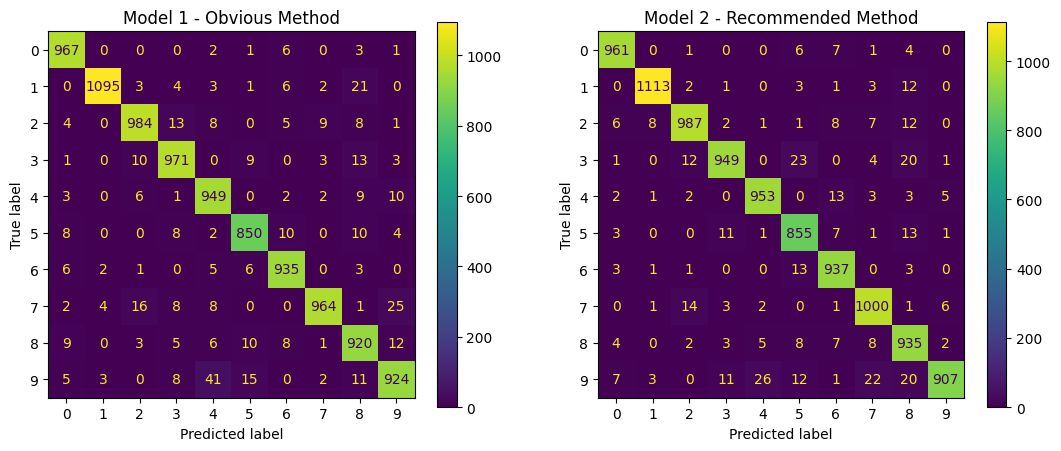

In [50]:
labels = list(range(10))
plt.close()
result_1_processed = [i.argmax() for i in result_1]
fig, (ax1, ax2) = plt.subplots(
    1, 2,
    figsize = (13, 5),
    width_ratios = (1, 1),
    height_ratios = (1,)
)
# confusion_matrix_1 = confusion_matrix(y_test, result_1_processed, labels=labels)
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    result_1_processed,
    ax = ax1)
disp.ax_.set_title("Model 1 - Obvious Method")

result_2_processed = [i.argmax() for i in result_2]
# confusion_matrix_2 = confusion_matrix(y_test, result_2_processed, labels=labels)
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    result_2_processed,
    ax = ax2)
disp.ax_.set_title("Model 2 - Recommended Method")
plt.show()